In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### 欧拉插值函数可视化

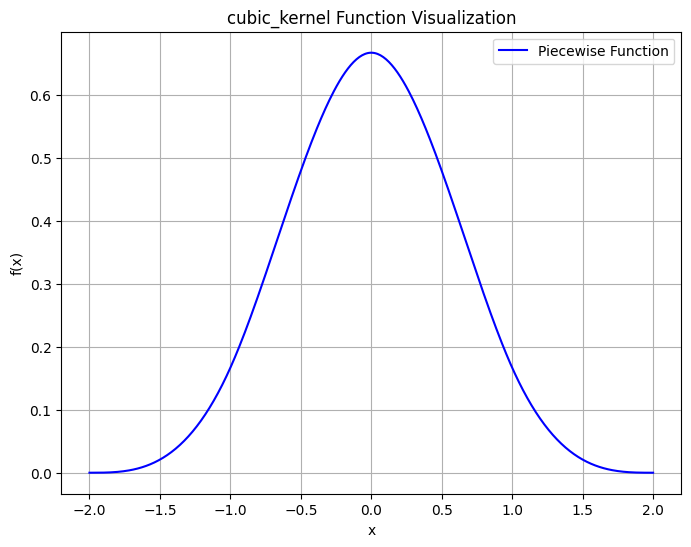

In [30]:
# 定义分段函数
def cubic_kernel(x):
    if -1 <= x < 1:
        return 0.5*np.abs(x)**3-np.abs(x)**2+2.0/3
    elif 1 <= x <= 2 or -2 <= x < -1:
        return 1/6*(2-np.abs(x))**3
    else:
        return 0

# 生成 x 值
x_values = np.linspace(-2, 2, 400)
y_values = [cubic_kernel(x) for x in x_values]

# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Piecewise Function', color='blue')
plt.title('cubic_kernel Function Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


In [31]:
import warp as wp

@wp.kernel
def print_kernel():
    print("Hello, Warp!")
    base_pos_x = wp.int(grid_pos[0] - 0.5)
    base_pos_y = wp.int(grid_pos[1] - 0.5)
    base_pos_z = wp.int(grid_pos[2] - 0.5)
    fx = grid_pos - wp.vec3(
        wp.float(base_pos_x), wp.float(base_pos_y), wp.float(base_pos_z)
    )
    wa = wp.vec3(1.5) - fx
    wb = fx - wp.vec3(1.0)
    wc = fx - wp.vec3(0.5)
    w = wp.mat33(
        wp.cw_mul(wa, wa) * 0.5,
        wp.vec3(0.0, 0.0, 0.0) - wp.cw_mul(wb, wb) + wp.vec3(0.75),
        wp.cw_mul(wc, wc) * 0.5,
    )

## Velocity grid damping scale test

In [32]:
import numpy as np
damping_scale=np.array([0.9999])
np.power(damping_scale,50000)

array([0.00673626])

## point_cloud.ply data visualization

In [33]:
from plyfile import PlyData, PlyElement
ficus_data=PlyData.read("/home/jiahao/dragGaussian/PhysGaussian/model/ficus_whitebg-trained/point_cloud/iteration_30000/point_cloud.ply")
print("header for ficus data:")
print(ficus_data.header)

header for ficus data:
ply
format binary_little_endian 1.0
element vertex 203930
property float x
property float y
property float z
property float nx
property float ny
property float nz
property float f_dc_0
property float f_dc_1
property float f_dc_2
property float f_rest_0
property float f_rest_1
property float f_rest_2
property float f_rest_3
property float f_rest_4
property float f_rest_5
property float f_rest_6
property float f_rest_7
property float f_rest_8
property float f_rest_9
property float f_rest_10
property float f_rest_11
property float f_rest_12
property float f_rest_13
property float f_rest_14
property float f_rest_15
property float f_rest_16
property float f_rest_17
property float f_rest_18
property float f_rest_19
property float f_rest_20
property float f_rest_21
property float f_rest_22
property float f_rest_23
property float f_rest_24
property float f_rest_25
property float f_rest_26
property float f_rest_27
property float f_rest_28
property float f_rest_29
property

In [34]:
ficus_xyz = np.stack((np.asarray(ficus_data.elements[0]["x"]),
                np.asarray(ficus_data.elements[0]["y"]),
                np.asarray(ficus_data.elements[0]["z"])),  axis=1)
print("ficus_xyz shape:",ficus_xyz.shape)

ficus_xyz shape: (203930, 3)


In [35]:
print("max point:",ficus_xyz.max(axis=0))
print("min point:",ficus_xyz.min(axis=0))

max point: [0.5523032  0.57470113 1.1410387 ]
min point: [-0.3735972 -0.8557943 -1.0332751]


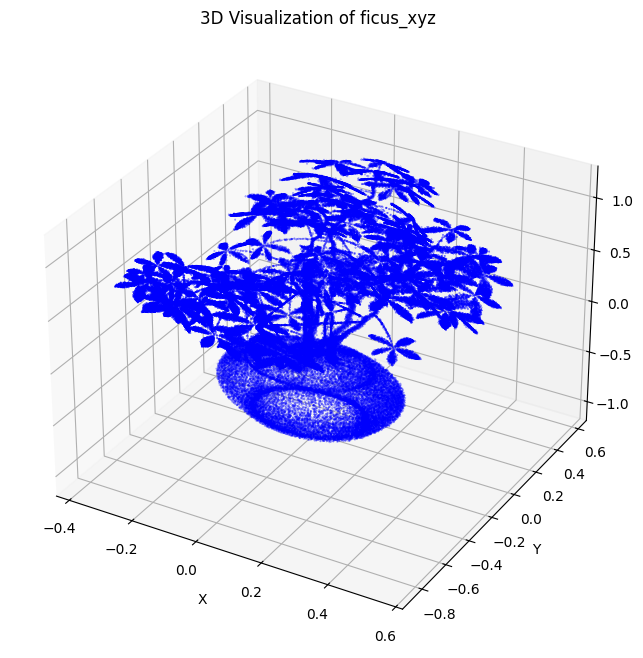

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ficus_xyz[:, 0], ficus_xyz[:, 1], ficus_xyz[:, 2], s=0.1,c='b', marker='o')

ax.set_title('3D Visualization of ficus_xyz')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [37]:
def info_ply(ply_path):
    ply_data=PlyData.read(ply_path)
    # print("header for ply data:")
    # print(ply_data.header)
    xyz = np.stack((np.asarray(ply_data.elements[0]["x"]),
                np.asarray(ply_data.elements[0]["y"]),
                np.asarray(ply_data.elements[0]["z"])),  axis=1)
    print("xyz shape:",xyz.shape)
    print("max point:",xyz.max(axis=0))
    print("min point:",xyz.min(axis=0))

    return xyz

In [38]:
point_cloud_path="/home/jiahao/dragGaussian/PhysGaussian/model/ficus_whitebg-trained/point_cloud/iteration_30000/point_cloud.ply"
print("info for ficus data:")
ficus_xyz=info_ply(point_cloud_path)
transformed_ficus_path="./log_ficus/transformed_particles.ply"
print("info for transformed ficus data:")
transformed_ficus_xyz=info_ply(transformed_ficus_path)

info for ficus data:
xyz shape: (203930, 3)
max point: [0.5523032  0.57470113 1.1410387 ]
min point: [-0.3735972 -0.8557943 -1.0332751]
info for transformed ficus data:
xyz shape: (171553, 3)
max point: [1.2130644 1.3291254 1.5      ]
min point: [0.7869355 0.6708746 0.5      ]


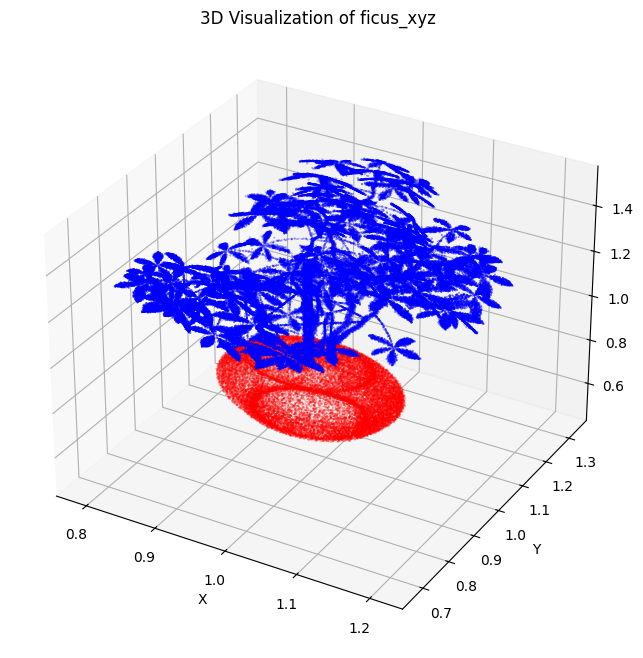

In [39]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 根据 x, y, z 值设置颜色
colors = np.where((0.5 < transformed_ficus_xyz[:, 0]) & (transformed_ficus_xyz[:, 0] < 1.5) &
                  (0.5 < transformed_ficus_xyz[:, 1]) & (transformed_ficus_xyz[:, 1] < 1.5) &
                  (0.22 < transformed_ficus_xyz[:, 2]) & (transformed_ficus_xyz[:, 2] < 0.78), 'r', 'b')

ax.scatter(transformed_ficus_xyz[:, 0], transformed_ficus_xyz[:, 1], transformed_ficus_xyz[:, 2], s=0.1, c=colors, marker='o')

ax.set_title('3D Visualization of ficus_xyz')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [40]:
ikun_path="./log_ikun/init_particles.ply"
print("info for ikun data:")
ikun_xyz=info_ply(ikun_path)
transformed_ikun_path="./log_ikun/transformed_particles.ply"
print("info for transformed ikun data:")
transformed_ikun_xyz=info_ply(transformed_ikun_path)

info for ikun data:
xyz shape: (8198, 3)
max point: [0.3784226  0.45610958 0.3247927 ]
min point: [-0.40378895 -0.52011603 -0.32534495]
info for transformed ikun data:
xyz shape: (8198, 3)
max point: [1.4006305 1.5       1.3329854]
min point: [0.59936947 0.5        0.6670146 ]


In [41]:
ikun_rgba_data=PlyData.read("/home/jiahao/dragGaussian/PhysGaussian/model/ikun_rgba_whitebg-trained/point_cloud/iteration_7000/point_cloud.ply")
print("header for ikun_rgba data:")
print(ikun_rgba_data.header)

header for ikun_rgba data:
ply
format binary_little_endian 1.0
element vertex 9505
property float x
property float y
property float z
property float f_dc_0
property float f_dc_1
property float f_dc_2
property float opacity
property float scale_0
property float scale_1
property float scale_2
property float rot_0
property float rot_1
property float rot_2
property float rot_3
end_header


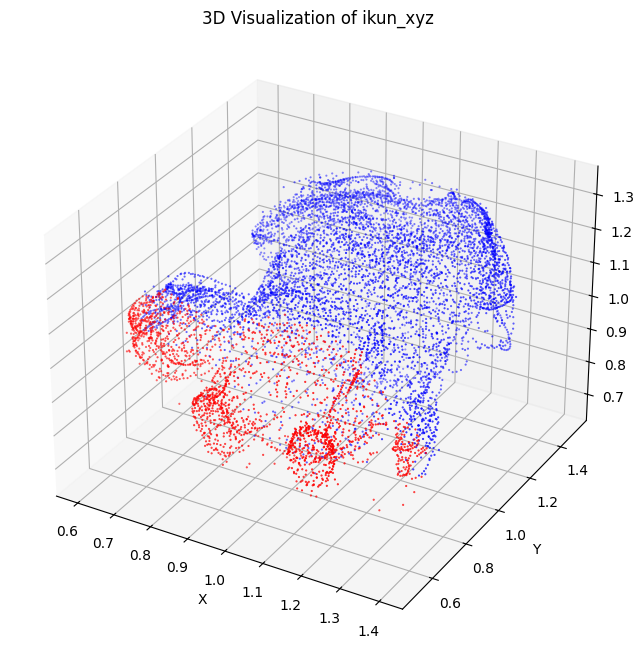

In [42]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 根据 x, y, z 值设置颜色
colors = np.where((0.5 < transformed_ikun_xyz[:, 0]) & (transformed_ikun_xyz[:, 0] < 1.5) &
                  (0.23 < transformed_ikun_xyz[:, 1]) & (transformed_ikun_xyz[:, 1] < 0.77) &
                  (0.5 < transformed_ikun_xyz[:, 2]) & (transformed_ikun_xyz[:, 2] < 1.5), 'r', 'b')

ax.scatter(transformed_ikun_xyz[:, 0], transformed_ikun_xyz[:, 1], transformed_ikun_xyz[:, 2], s=0.3,c=colors, marker='o')

ax.set_title('3D Visualization of ikun_xyz')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## Bake Gaussian data Analysis

In [43]:
paladin_data=PlyData.read("/home/jiahao/dragGaussian/PhysGaussian/model/paladin_whitebg-trained/point_cloud/iteration_7000/point_cloud.ply")
print("header for paladin data:")
print(paladin_data.header)

header for paladin data:
ply
format binary_little_endian 1.0
element vertex 163763
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
property float f_dc_0
property float f_dc_1
property float f_dc_2
property float f_rest_0
property float f_rest_1
property float f_rest_2
property float f_rest_3
property float f_rest_4
property float f_rest_5
property float f_rest_6
property float f_rest_7
property float f_rest_8
property float f_rest_9
property float f_rest_10
property float f_rest_11
property float f_rest_12
property float f_rest_13
property float f_rest_14
property float f_rest_15
property float f_rest_16
property float f_rest_17
property float f_rest_18
property float f_rest_19
property float f_rest_20
property float f_rest_21
property float f_rest_22
property float f_rest_23
property float f_rest_24
property float f_rest_25
property float f_rest_26
property float f_rest_27
property float f_rest_28
property float f_rest_29


In [47]:
opacities = np.asarray(paladin_data.elements[0]["opacity"])[..., np.newaxis]
opacities.shape

(163763, 1)

In [49]:
gradio_data=PlyData.read("./gradio_output.ply")
print("gradio_rose.shape:",gradio_data.elements[0].data.shape)
print("header for gradio data:")
print(gradio_data.header)

gradio_rose.shape: (37913,)
header for gradio data:
ply
format binary_little_endian 1.0
element vertex 37913
property float x
property float y
property float z
property float f_dc_0
property float f_dc_1
property float f_dc_2
property float opacity
property float scale_0
property float scale_1
property float scale_2
property float rot_0
property float rot_1
property float rot_2
property float rot_3
end_header


In [45]:
import numpy as np
# 生成两个随机数矩阵
matrix_a = np.random.rand(3, 3)
matrix_b = np.random.rand(3, 3)

# 进行矩阵乘法
result_matrix = np.dot(matrix_a, matrix_b)
print("Matrix A:\n", matrix_a)
print("Matrix B:\n", matrix_b)
print("Result of matrix multiplication:\n", result_matrix)
print("matrix_a@matrix_b:\n",matrix_a@matrix_b)

Matrix A:
 [[0.73351794 0.56386178 0.84251631]
 [0.89537289 0.03932147 0.23049223]
 [0.65812333 0.60383656 0.76823463]]
Matrix B:
 [[9.69299984e-01 5.61887895e-04 6.08522339e-01]
 [7.08671626e-01 8.55045679e-01 2.34029454e-01]
 [4.25053116e-02 9.40547692e-01 8.52210326e-01]]
Result of matrix multiplication:
 [[1.14640319 1.27496651 1.29632342]
 [0.90554809 0.25091369 0.75048465]
 [1.09849483 1.23923894 1.19649578]]
matrix_a@matrix_b:
 [[1.14640319 1.27496651 1.29632342]
 [0.90554809 0.25091369 0.75048465]
 [1.09849483 1.23923894 1.19649578]]


In [46]:
np.matmul(matrix_a,matrix_b)

array([[1.14640319, 1.27496651, 1.29632342],
       [0.90554809, 0.25091369, 0.75048465],
       [1.09849483, 1.23923894, 1.19649578]])